In [1]:
import numpy as np
import pandas as pd
from collections import OrderedDict 
import matplotlib.pyplot as plt
import xlsxwriter
import datetime
import os

In [2]:
all_data_file = "All Data.xlsx"
hedge_fund_file = "Hedge Fund Strategies Sorted.xlsx"

output_dir = 'out'
spreadsheet_name = 'the-final-destination.xlsx'
all_sheetnames_name = "all-sheetnames.txt"
images_dir = "images"

spreadsheet_name = os.path.expanduser(os.path.join(output_dir, spreadsheet_name))
all_sheetnames_name = os.path.expanduser(os.path.join(output_dir, all_sheetnames_name))
images_dir = os.path.expanduser(os.path.join(output_dir, images_dir))

if not os.path.isdir(output_dir):
    os.makedirs(output_dir)

if not os.path.isdir(images_dir):
    os.makedirs(images_dir)

In [3]:
with open('names.txt', 'r') as f:
    names = [line.rstrip() for line in f.readlines()]

names

['CAliveW',
 'CAdeadW',
 'CAliveWO',
 'CAdeadWO',
 'DSBliveW',
 'DSBdeadW',
 'DSBliveWO',
 'DSBdeadWO',
 'EMliveW',
 'EMdeadW',
 'EMliveWO',
 'EMdeadWO',
 'EMNliveW',
 'EMNdeadW',
 'EMNliveWO',
 'EMNdeadWO',
 'EventliveW',
 'EventdeadW',
 'EventliveWO',
 'EventdeadWO',
 'FixedliveW',
 'FixeddeadW',
 'FixedliveWO',
 'FixeddeadWO',
 'FoFliveW',
 'FoFdeadW',
 'FoFliveWO',
 'FoFdeadWO',
 'GMliveW',
 'GMdeadW',
 'GMliveWO',
 'GMdeadWO',
 'LSliveW',
 'LSdeadW',
 'LSliveWO',
 'LSdeadWO',
 'MFliveW',
 'MFdeadW',
 'MFliveWO',
 'MFdeadWO',
 'MultiliveW',
 'MultideadW',
 'MultiliveWO',
 'MultideadWO',
 'OptionsliveW',
 'OptionsdeadW',
 'OptionsliveWO',
 'OptionsdeadWO',
 'OtherliveW',
 'OtherdeadW',
 'OtherliveWO',
 'OtherdeadWO',
 'UndefinedliveW',
 'UndefineddeadW',
 'UndefinedliveWO',
 'UndefineddeadWO']

In [4]:
# sheet_name=None reads all sheets, not needed here...
manager_data = pd.read_excel(all_data_file, sheet_name="ProductDetails")
returns_data = pd.read_excel(hedge_fund_file, sheet_name=None)

In [5]:
manager_data

,ProductReference,Name,PrimaryCategory,CurrencyCode,CurrencyDescription,LegalStructure,ClosedToInvestDate,ReopenToInvestDate,InceptionDate,PerformanceStartDate,...,RedemptionFrequency,RedemptionNoticePeriod,LockUpPeriod,LockUpComment,PayOutPeriod,PayOutComment,AuditDate,RegisteredInvestmentAdviser,DomicileState,DomicileCountry
0,818,Global Megatrend Energy Fund,Convertible Arbitrage,USD,US Dollar,Limited Liability Company,NaN,NaN,1995-02-01 00:00:00,2009-01-29 00:00:00,...,Monthly,30.0,0.0,Up to 3% will be charged if redeems within the...,10.0,Normally will be made within 10 business days ...,2018-12-31,0.0,Non,Saint Vincent And The Grenadines
1,4068,Camden Yield Strategies II LP,Convertible Arbitrage,USD,US Dollar,Limited Partnership,NaN,NaN,1993-07-01 00:00:00,2009-01-29 00:00:00,...,Monthly,30.0,0.0,No Lockup Period,0.0,No payout comment,2018-12-31,1.0,Cal,United States
2,34261,Symphony Rhapsody LP,Convertible Arbitrage,USD,US Dollar,Limited Partnership,NaN,NaN,1998-12-01 00:00:00,2009-01-29 00:00:00,...,Quarterly,30.0,12.0,NaN,5.0,"5 bd for partial redemption, 15-20 BD for full...",2018-12-31,1.0,Cal,United States
3,34758,SSI Hedged Convertible Opportunity LP,Convertible Arbitrage,USD,US Dollar,Limited Partnership,NaN,NaN,2001-12-03 00:00:00,2017-10-04 00:00:00,...,Monthly,30.0,0.0,There is no lock up period.,0.0,At least 95% after 30days. Remaining balance ...,2018-12-31,1.0,Del,United States
4,35348,Wolverine Flagship Trading Ltd,Convertible Arbitrage,USD,US Dollar,Exempted Company,NaN,NaN,2001-09-03 00:00:00,2009-01-29 00:00:00,...,Quarterly,60.0,18.0,If redeemed before 1 year fee of up to 3%.,30.0,Varies. As soon as practical.,2018-12-31,0.0,Non,Bermuda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.547723,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.779995,46.5012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.62698,16.9194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.23458,126.377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [6]:
returns_data.keys()

dict_keys(['ConvArb', 'DSB', 'EM', 'EMN', 'Event', 'Fixed', 'FoF', 'GM', 'LS', 'MF', 'Multi', 'Options', 'Other', 'Undefined'])

In [7]:
returns_data.get("ConvArb")

,Unnamed: 0,818,4068,34261,34758,35348,44464,50630,76185,80077,...,110818,111545,111820,111821,111822,111823,111824,111828,113639,137668
0,1978-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1978-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1978-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1978-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1978-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2018-08-31,-0.212283,-0.01,0.54,0.6200,1.14,0.52,-5.431223,0.090676,-6.077861,...,0.560890,0.560890,0.489563,0.389509,0.596166,0.370207,0.263575,0.433070,0.560890,0.50
486,2018-09-30,-3.773083,0.81,0.27,-0.2200,0.86,0.25,18.354978,0.977654,21.193021,...,0.548392,0.548392,0.011899,-0.089534,0.110068,0.027878,-0.099318,0.090421,0.548392,1.06
487,2018-10-31,-0.187300,0.82,0.88,-0.2874,-1.21,0.86,-20.190198,4.003589,-20.433991,...,0.009754,0.009754,-7.153065,-7.253663,-7.055283,-7.481777,-7.583216,-7.423860,0.009754,0.46
488,2018-11-30,-0.095364,-0.93,0.01,NaN,-0.56,-0.02,-5.499542,-4.004026,-5.142400,...,-0.191484,-0.191484,-0.583590,-0.698652,-0.478842,-0.744279,-0.854012,-0.682132,-0.191484,1.04


In [8]:
manager_data.columns

Index(['ProductReference', 'Name', 'PrimaryCategory', 'CurrencyCode',
       'CurrencyDescription', 'LegalStructure', 'ClosedToInvestDate',
       'ReopenToInvestDate', 'InceptionDate', 'PerformanceStartDate',
       'PerformanceEndDate', 'GrossNett', 'InitialNAV', 'InitialSharePrice',
       'Guaranteed', 'NavROR', 'MinimumInvestment', 'ManagementFee',
       'IncentiveFee', 'ManagementFeePayablePeriod', 'HighWaterMark',
       'ShareEqualisationMethod', 'Leveraged', 'MaxLeverage', 'AvgLeverage',
       'Futures', 'Derivatives', 'Margin', 'FXCredit', 'PersonalCapital',
       'PersonalCapitalAmount', 'CurrencyExposure', 'OpenEnded',
       'OpenToPublic', 'InvestsInManagedAccounts', 'InvestsInOtherFunds',
       'AcceptsManagedAccounts', 'ManagedAccountsMinAmount',
       'TrackingFrequency', 'SubscriptionFrequency', 'RedemptionFrequency',
       'RedemptionNoticePeriod', 'LockUpPeriod', 'LockUpComment',
       'PayOutPeriod', 'PayOutComment', 'AuditDate',
       'RegisteredInvestment

In [9]:
strat_info_df = manager_data.loc[manager_data['ProductReference'] == 818]
strat_info_df

,ProductReference,Name,PrimaryCategory,CurrencyCode,CurrencyDescription,LegalStructure,ClosedToInvestDate,ReopenToInvestDate,InceptionDate,PerformanceStartDate,...,RedemptionFrequency,RedemptionNoticePeriod,LockUpPeriod,LockUpComment,PayOutPeriod,PayOutComment,AuditDate,RegisteredInvestmentAdviser,DomicileState,DomicileCountry
0,818,Global Megatrend Energy Fund,Convertible Arbitrage,USD,US Dollar,Limited Liability Company,NaN,NaN,1995-02-01 00:00:00,2009-01-29 00:00:00,...,Monthly,30.0,0.0,Up to 3% will be charged if redeems within the...,10.0,Normally will be made within 10 business days ...,2018-12-31,0.0,Non,Saint Vincent And The Grenadines


In [10]:
pd.DataFrame(returns_data.get(next(iter(returns_data.keys()))).iloc[:, 0])

,Unnamed: 0
0,1978-03-31
1,1978-04-30
2,1978-05-31
3,1978-06-30
4,1978-07-31
...,...
485,2018-08-31
486,2018-09-30
487,2018-10-31
488,2018-11-30


In [11]:
output_sheets = {}

for strat_name, strat_df in returns_data.items():
    
    print("Processing {}...".format(strat_name))
        
    dates_dropped = strat_df.drop(strat_df.columns[0], axis=1, inplace=False)
            
    for product_num, returns in dates_dropped.iteritems():
                        
        # print(product_num)
        
        # Check if bottom row has an existing return number - if product is dead     
        is_dead = np.isnan(returns.iloc[-1])
        # print("Dead: {}".format(is_dead))
        
        # Check if manager invests in their fund
        strat_info_df = manager_data.loc[manager_data['ProductReference'] == product_num]        
        has_man = strat_info_df.iloc[0]['PersonalCapital'] == 1
        # print("Has man: {}".format(has_man))
        
        sheet_name = "{}{}{}".format(
            strat_name,
            "dead" if is_dead else "live",
            "W" if has_man else "WO"
        )
        
        # print(sheet_name)
        
        # NOTE: This assumes that the dates are the same in every sheet of returns_data
        
        # Add list of dates if sheet not yet created
        # TODO: Remove if False
        if sheet_name not in output_sheets:
            df = pd.DataFrame(returns_data.get(next(iter(returns_data.keys()))).iloc[:, 0])
            output_sheets[sheet_name] = df
        
        # Append info to dataframe
        assert len(output_sheets[sheet_name].iloc[:, 0]) == len(returns)
        output_sheets[sheet_name][product_num] = returns    

Processing ConvArb...
Processing DSB...
Processing EM...
Processing EMN...
Processing Event...
Processing Fixed...
Processing FoF...
Processing GM...
Processing LS...
Processing MF...
Processing Multi...
Processing Options...
Processing Other...
Processing Undefined...


In [12]:
output_sheets.keys()

dict_keys(['ConvArbliveW', 'ConvArbdeadWO', 'ConvArbliveWO', 'DSBliveW', 'DSBdeadWO', 'DSBliveWO', 'EMliveW', 'EMdeadW', 'EMdeadWO', 'EMliveWO', 'EMNdeadWO', 'EMNliveWO', 'EMNliveW', 'EMNdeadW', 'EventliveW', 'EventliveWO', 'EventdeadW', 'EventdeadWO', 'FixedliveWO', 'FixeddeadWO', 'FixedliveW', 'FixeddeadW', 'FoFliveWO', 'FoFdeadW', 'FoFdeadWO', 'FoFliveW', 'GMliveW', 'GMdeadWO', 'GMliveWO', 'GMdeadW', 'LSliveW', 'LSliveWO', 'LSdeadW', 'LSdeadWO', 'MFliveW', 'MFliveWO', 'MFdeadWO', 'MultiliveW', 'MultideadWO', 'MultiliveWO', 'MultideadW', 'OptionsliveW', 'OptionsdeadW', 'OptionsliveWO', 'OptionsdeadWO', 'OtherliveW', 'OtherdeadWO', 'OtherliveWO', 'OtherdeadW', 'UndefinedliveWO', 'UndefinedliveW', 'UndefineddeadWO', 'UndefineddeadW'])

In [13]:
output_sheets.get('ConvArbliveW')

,Unnamed: 0,818,4068,34261
0,1978-03-31,NaN,NaN,NaN
1,1978-04-30,NaN,NaN,NaN
2,1978-05-31,NaN,NaN,NaN
3,1978-06-30,NaN,NaN,NaN
4,1978-07-31,NaN,NaN,NaN
...,...,...,...,...
485,2018-08-31,-0.212283,-0.01,0.54
486,2018-09-30,-3.773083,0.81,0.27
487,2018-10-31,-0.187300,0.82,0.88
488,2018-11-30,-0.095364,-0.93,0.01


In [14]:
output_sheets.get('ConvArbdeadWO')

,Unnamed: 0,34758,76185,109546,111820,111821,111822,111823,111824,111828,137668
0,1978-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1978-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1978-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1978-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1978-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
485,2018-08-31,0.6200,0.090676,-0.112705,0.489563,0.389509,0.596166,0.370207,0.263575,0.433070,0.50
486,2018-09-30,-0.2200,0.977654,1.198350,0.011899,-0.089534,0.110068,0.027878,-0.099318,0.090421,1.06
487,2018-10-31,-0.2874,4.003589,3.952326,-7.153065,-7.253663,-7.055283,-7.481777,-7.583216,-7.423860,0.46
488,2018-11-30,NaN,-4.004026,-4.023966,-0.583590,-0.698652,-0.478842,-0.744279,-0.854012,-0.682132,1.04


In [15]:
df_tmp = output_sheets.get('ConvArbdeadWO').copy()

In [16]:
df_tmp.drop(df_tmp.columns[0], axis=1, inplace=True)

In [17]:
df_tmp

,34758,76185,109546,111820,111821,111822,111823,111824,111828,137668
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
485,0.6200,0.090676,-0.112705,0.489563,0.389509,0.596166,0.370207,0.263575,0.433070,0.50
486,-0.2200,0.977654,1.198350,0.011899,-0.089534,0.110068,0.027878,-0.099318,0.090421,1.06
487,-0.2874,4.003589,3.952326,-7.153065,-7.253663,-7.055283,-7.481777,-7.583216,-7.423860,0.46
488,NaN,-4.004026,-4.023966,-0.583590,-0.698652,-0.478842,-0.744279,-0.854012,-0.682132,1.04


In [18]:
df_tmp.apply(pd.Series.describe, axis=1)[['mean', 'std']]

,mean,std
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
485,0.364006,0.228813
486,0.306742,0.543858
487,-3.582235,5.008599
488,-1.225500,1.680627


In [19]:
tmp = pd.DataFrame([[np.nan, 2, 3], [4, 5, 6]])
tmp

,0,1,2
0,NaN,2,3
1,4.0,5,6


In [20]:
tmp.apply(pd.Series.describe, axis=1)

,count,mean,std,min,25%,50%,75%,max
0,2.0,2.5,0.707107,2.0,2.25,2.5,2.75,3.0
1,3.0,5.0,1.000000,4.0,4.50,5.0,5.50,6.0


In [21]:
# Add statistics to our output sheets

output_sheets_annotated = {}

for sheet_name, df in output_sheets.items():
    print("Processing {}...".format(sheet_name))
    dates_dropped = df.drop(df.columns[0], axis=1, inplace=False)    
    stats = dates_dropped.apply(pd.Series.describe, axis=1)[['mean', 'std']]
    output_sheets_annotated[sheet_name] = pd.concat([df, stats], axis=1)

Processing ConvArbliveW...
Processing ConvArbdeadWO...
Processing ConvArbliveWO...
Processing DSBliveW...
Processing DSBdeadWO...
Processing DSBliveWO...
Processing EMliveW...
Processing EMdeadW...
Processing EMdeadWO...
Processing EMliveWO...
Processing EMNdeadWO...
Processing EMNliveWO...
Processing EMNliveW...
Processing EMNdeadW...
Processing EventliveW...
Processing EventliveWO...
Processing EventdeadW...
Processing EventdeadWO...
Processing FixedliveWO...
Processing FixeddeadWO...
Processing FixedliveW...
Processing FixeddeadW...
Processing FoFliveWO...
Processing FoFdeadW...
Processing FoFdeadWO...
Processing FoFliveW...
Processing GMliveW...
Processing GMdeadWO...
Processing GMliveWO...
Processing GMdeadW...
Processing LSliveW...
Processing LSliveWO...
Processing LSdeadW...
Processing LSdeadWO...
Processing MFliveW...
Processing MFliveWO...
Processing MFdeadWO...
Processing MultiliveW...
Processing MultideadWO...
Processing MultiliveWO...
Processing MultideadW...
Processing Opt

In [22]:
output_sheets_annotated["MultideadW"]

,Unnamed: 0,73612,76647,79492,93799,96777,98236,99873,102084,103125,137792,143717,143720,144440,144840,mean,std
0,1978-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1978-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1978-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1978-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1978-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2018-08-31,1.398314,0.15,-0.15,1.397624,1.330636,0.20,0.0009,1.30,-1.43,-0.34,-2.0000,-0.3000,0.2,0.64,0.171248,1.028208
486,2018-09-30,3.669258,0.03,0.15,3.673767,3.608187,-1.40,-1.4688,-0.26,0.87,-0.08,-2.8000,-1.7000,-2.0,0.20,0.178029,2.135361
487,2018-10-31,0.932503,1.01,1.01,0.930239,0.868241,-4.52,-4.6020,-2.04,-1.75,NaN,-7.0000,-3.4000,-1.6,0.16,-1.538540,2.672937
488,2018-11-30,3.426622,-0.11,0.68,3.431469,3.365420,1.55,1.5904,-0.12,0.01,NaN,4.4199,3.2038,2.8,0.21,1.881355,1.631312


In [23]:
# TODO: If time, make dates the column indices

with pd.ExcelWriter(spreadsheet_name, engine='xlsxwriter') as writer:
    for sheetname, df in output_sheets_annotated.items():
        print("--> Writing sheet {}...".format(sheetname))
        df.to_excel(writer, sheetname)
    writer.save()

--> Writing sheet ConvArbliveW...
--> Writing sheet ConvArbdeadWO...
--> Writing sheet ConvArbliveWO...
--> Writing sheet DSBliveW...
--> Writing sheet DSBdeadWO...
--> Writing sheet DSBliveWO...
--> Writing sheet EMliveW...
--> Writing sheet EMdeadW...
--> Writing sheet EMdeadWO...
--> Writing sheet EMliveWO...
--> Writing sheet EMNdeadWO...
--> Writing sheet EMNliveWO...
--> Writing sheet EMNliveW...
--> Writing sheet EMNdeadW...
--> Writing sheet EventliveW...
--> Writing sheet EventliveWO...
--> Writing sheet EventdeadW...
--> Writing sheet EventdeadWO...
--> Writing sheet FixedliveWO...
--> Writing sheet FixeddeadWO...
--> Writing sheet FixedliveW...
--> Writing sheet FixeddeadW...
--> Writing sheet FoFliveWO...
--> Writing sheet FoFdeadW...
--> Writing sheet FoFdeadWO...
--> Writing sheet FoFliveW...
--> Writing sheet GMliveW...
--> Writing sheet GMdeadWO...
--> Writing sheet GMliveWO...
--> Writing sheet GMdeadW...
--> Writing sheet LSliveW...
--> Writing sheet LSliveWO...
--> W

In [24]:
with open(all_sheetnames_name, "w") as f:
    for i in output_sheets_annotated.keys():
        f.write(i)
        f.write("\n")

In [25]:
# Find max and min

min_val = min([min(df['mean'].dropna(inplace=False)) for df in output_sheets_annotated.values()])
max_val = max([max(df['mean'].dropna(inplace=False)) for df in output_sheets_annotated.values()])
        
print(min_val)
print(max_val)

-92.80094358
229.543451584


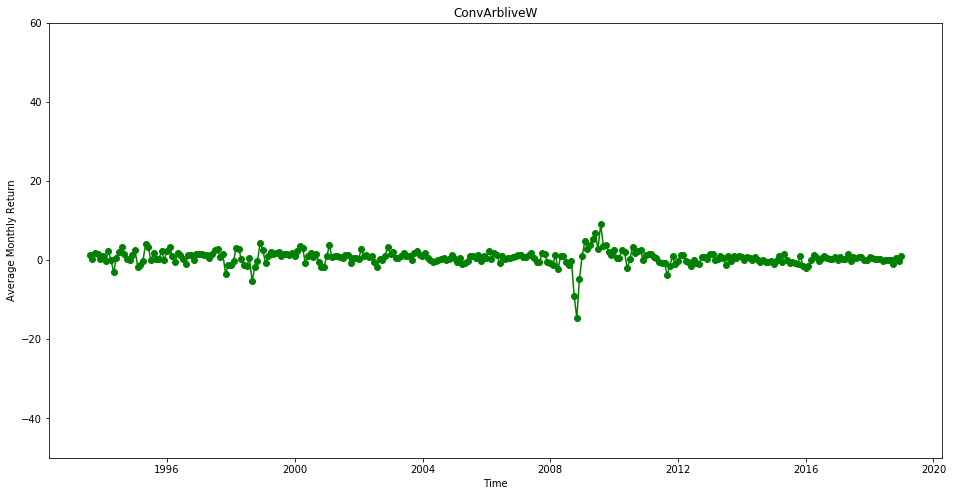

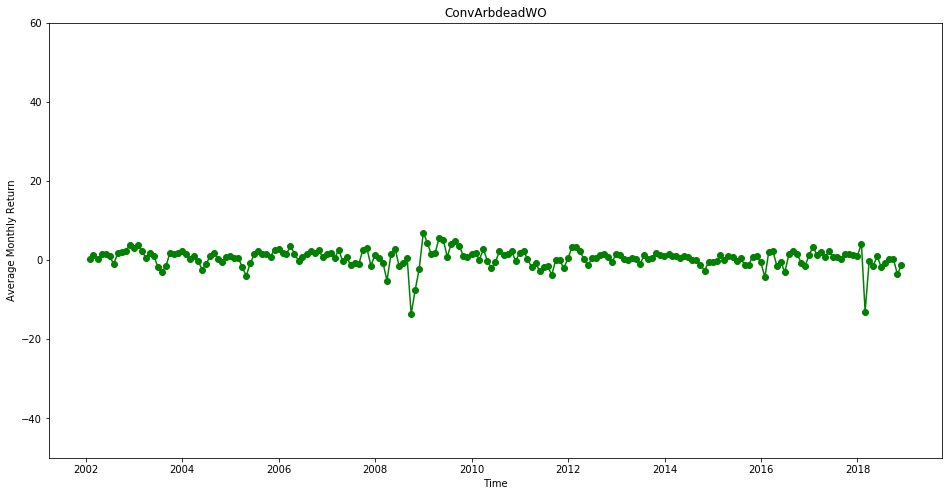

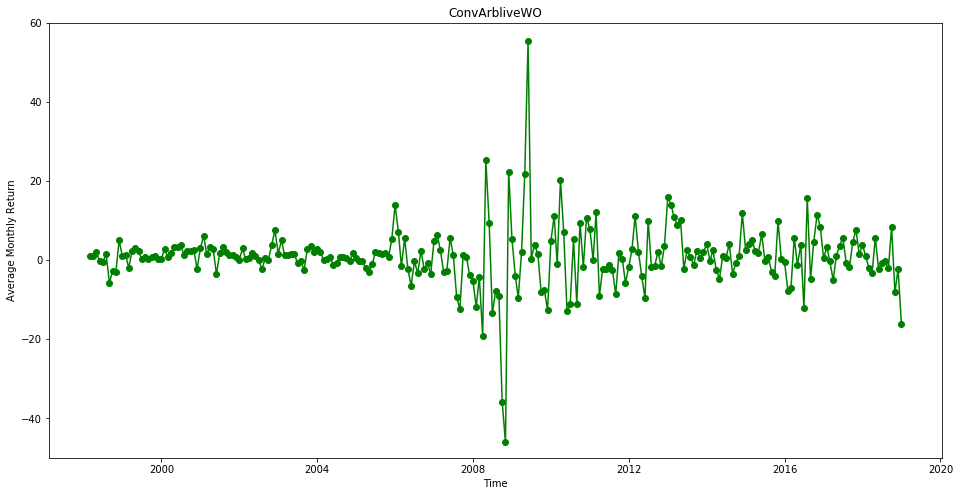

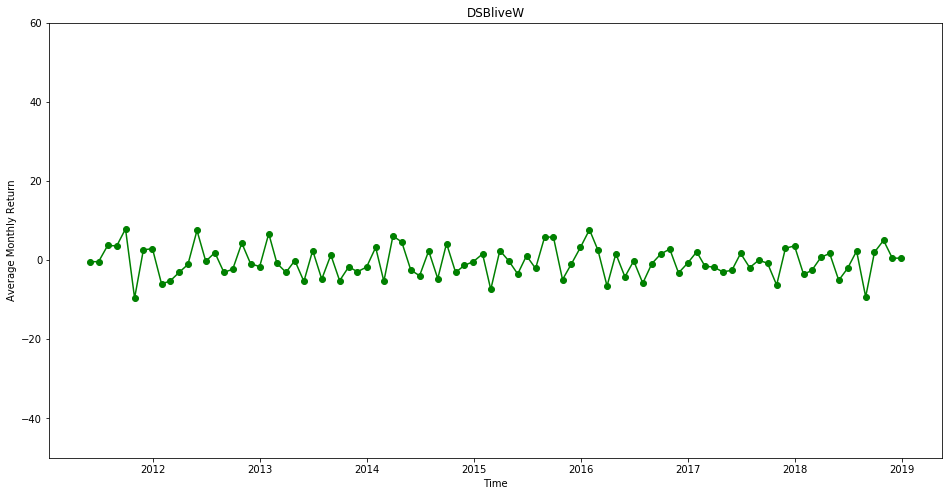

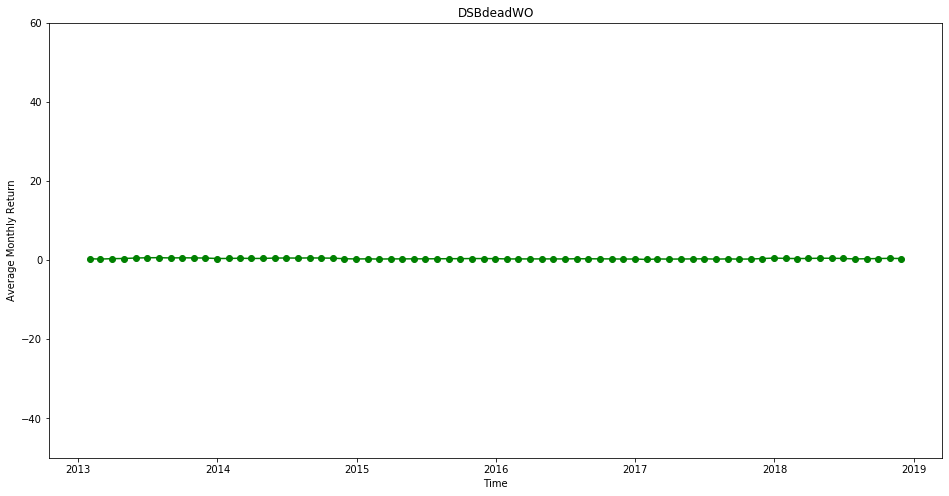

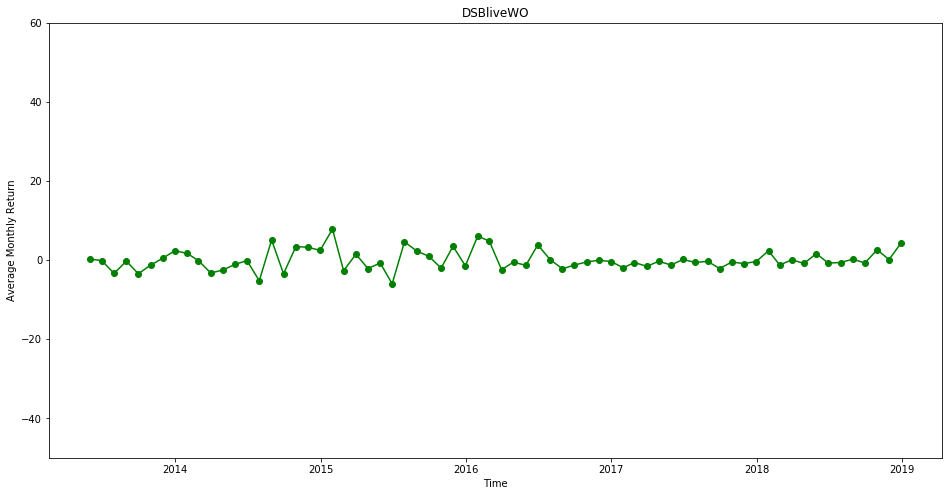

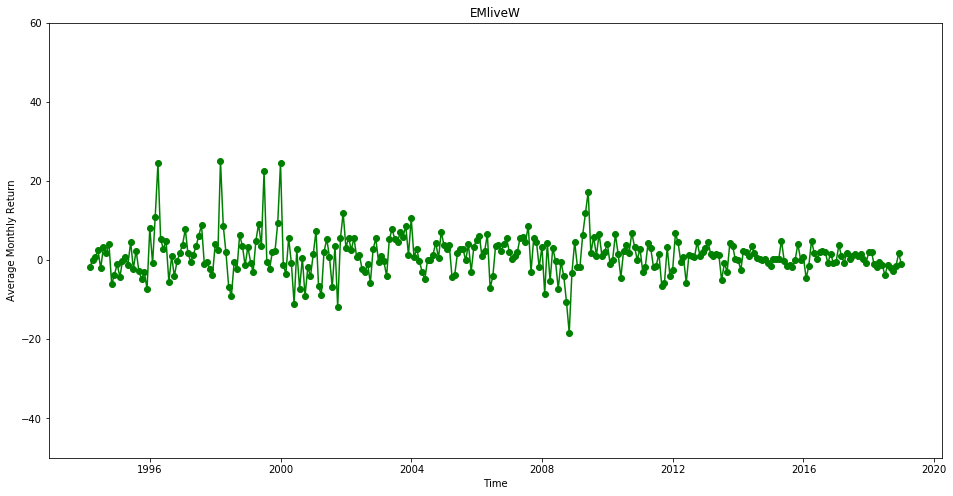

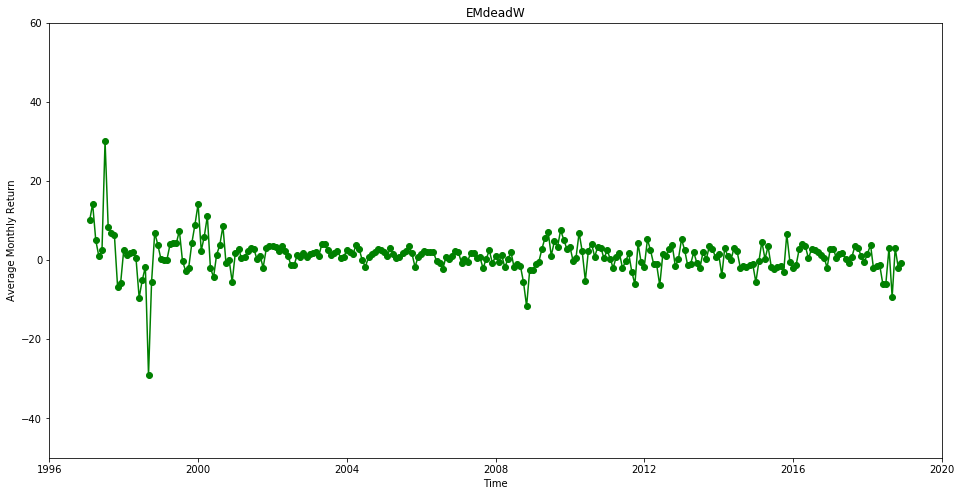

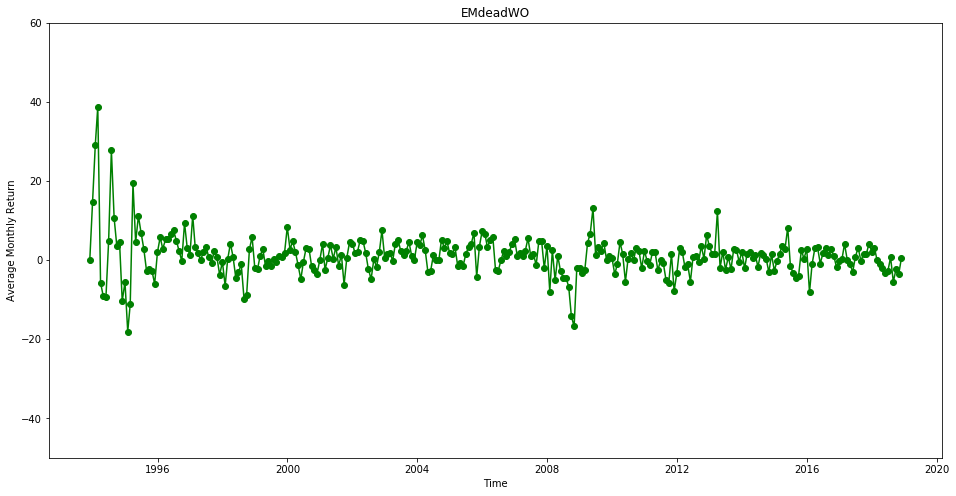

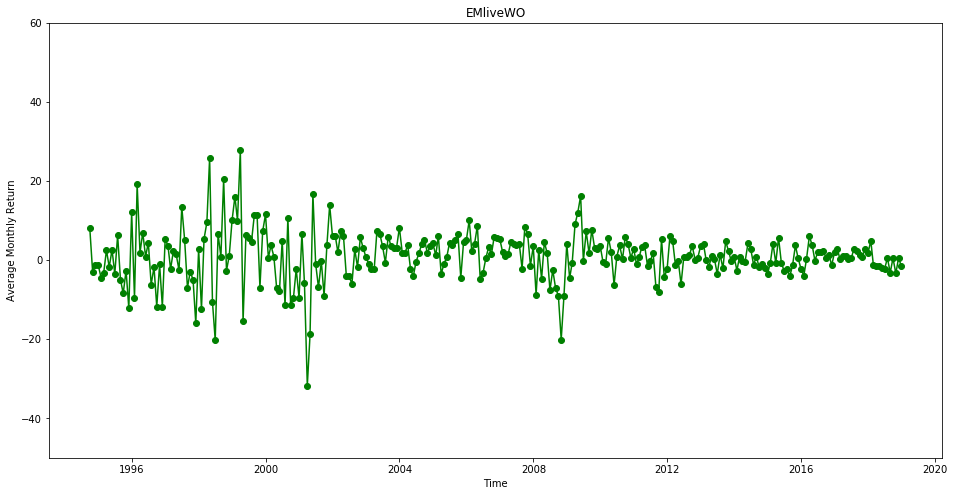

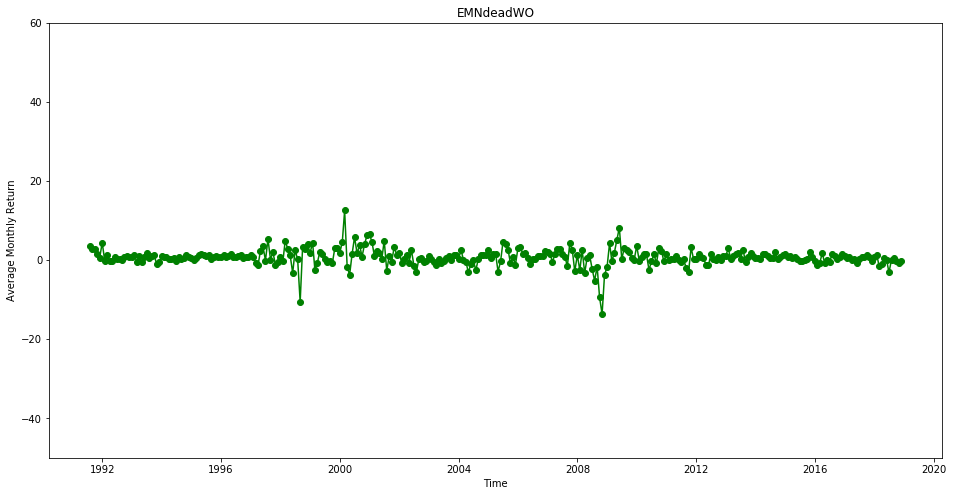

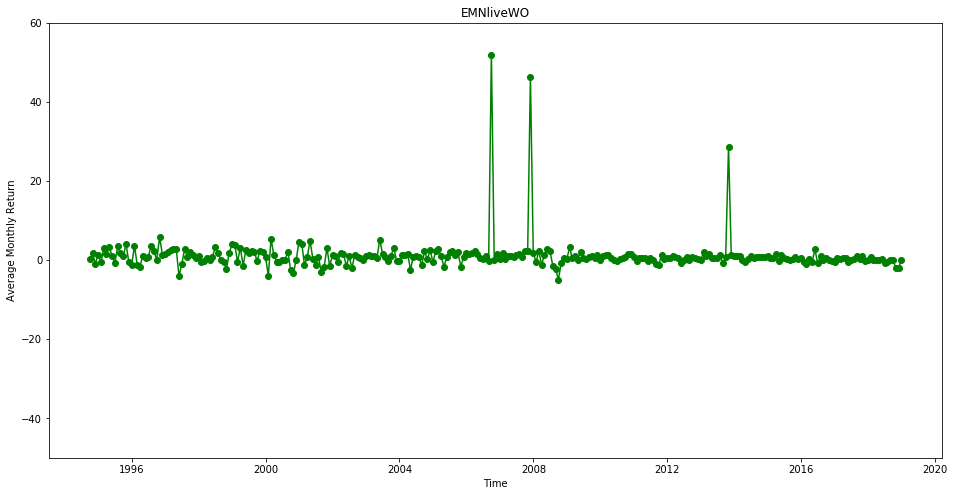

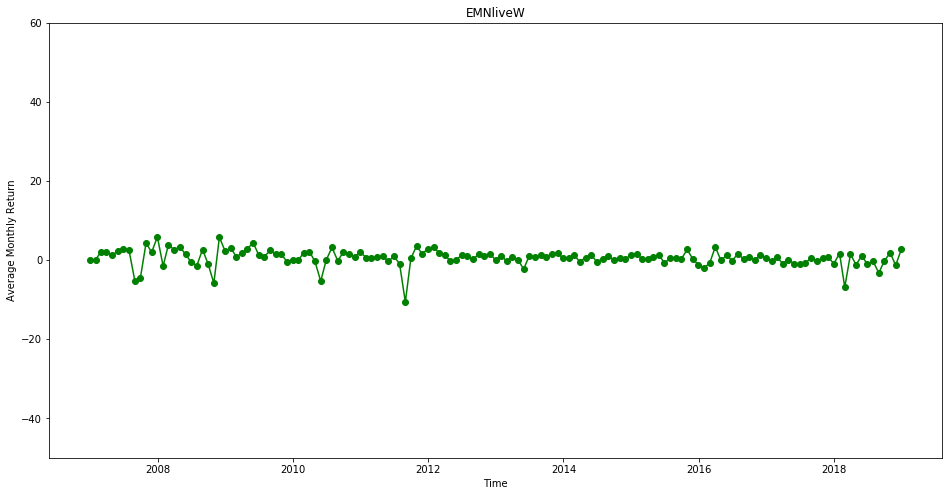

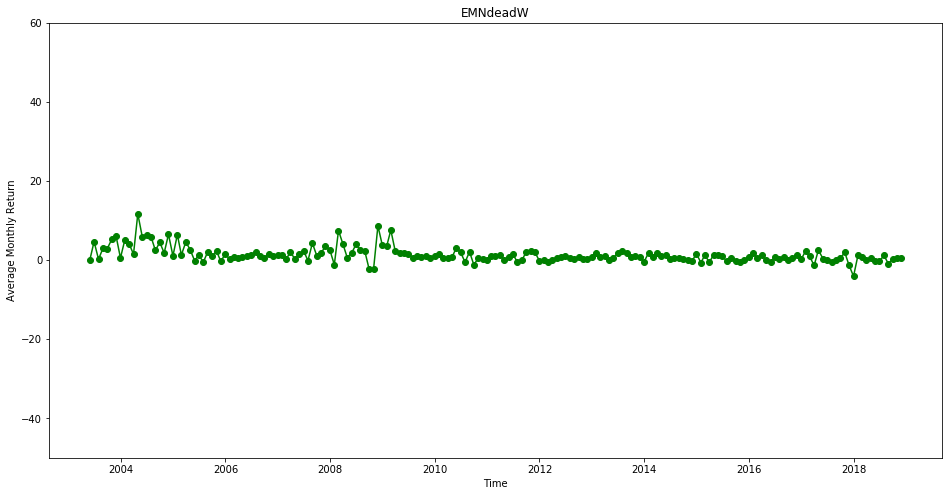

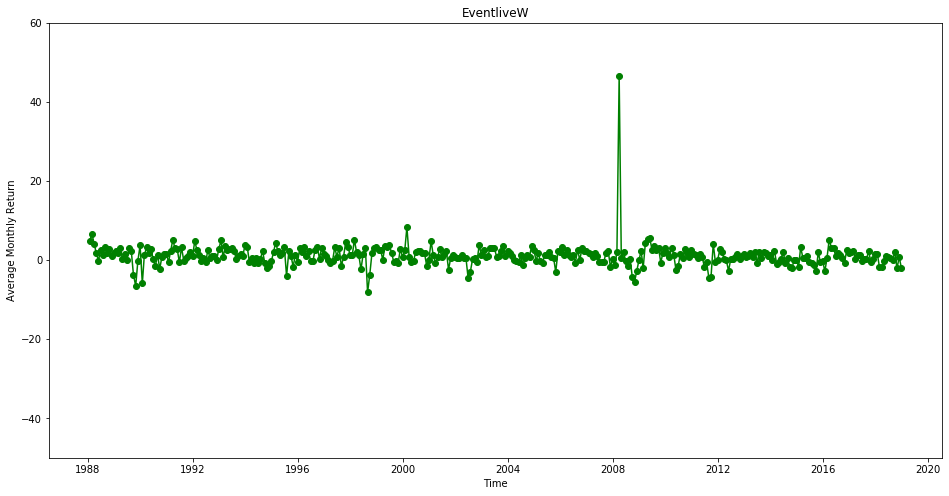

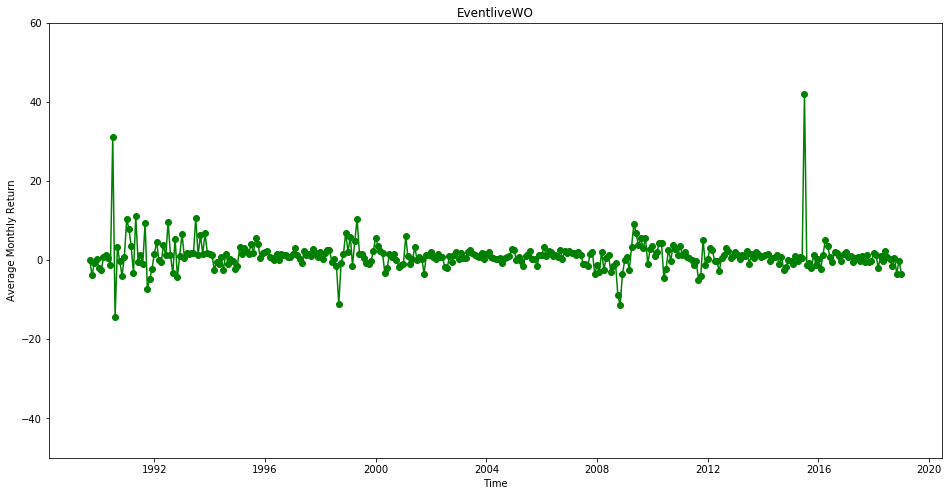

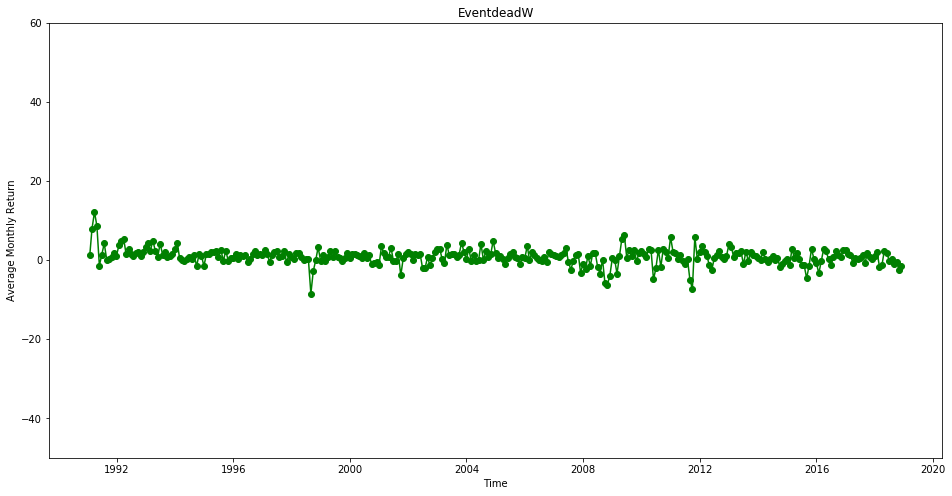

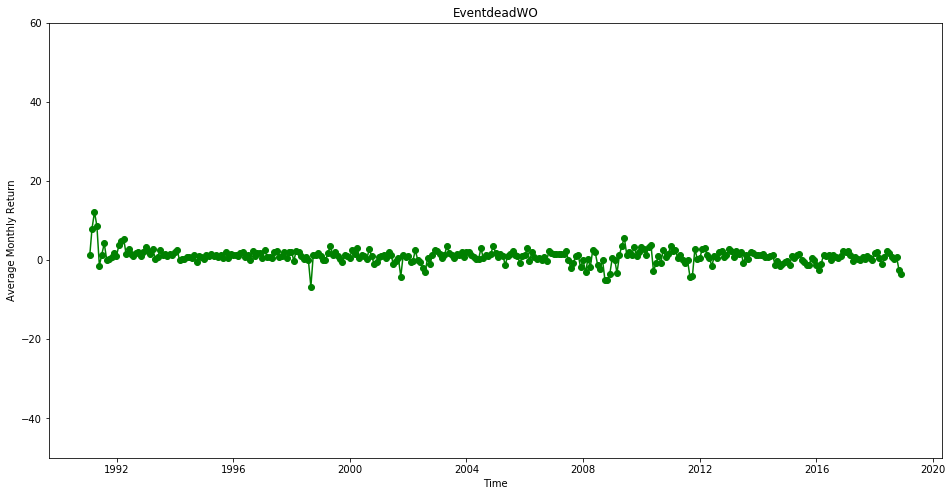

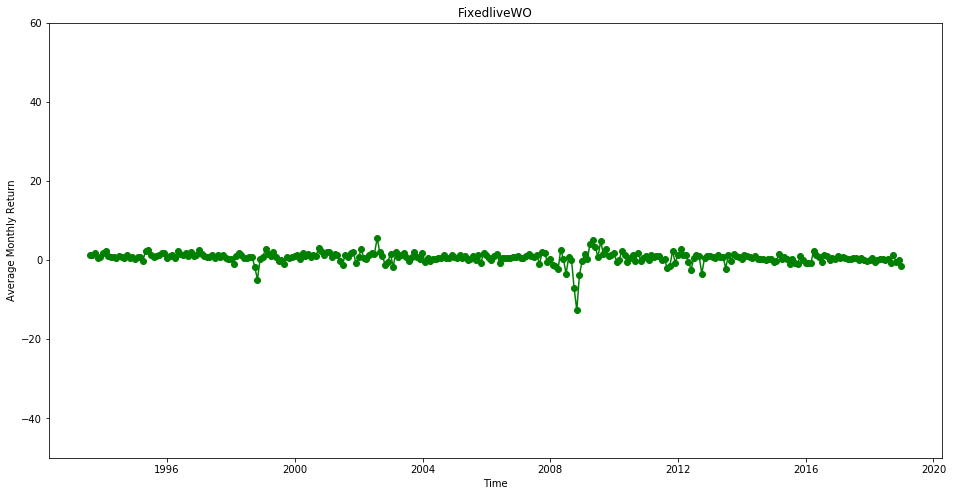

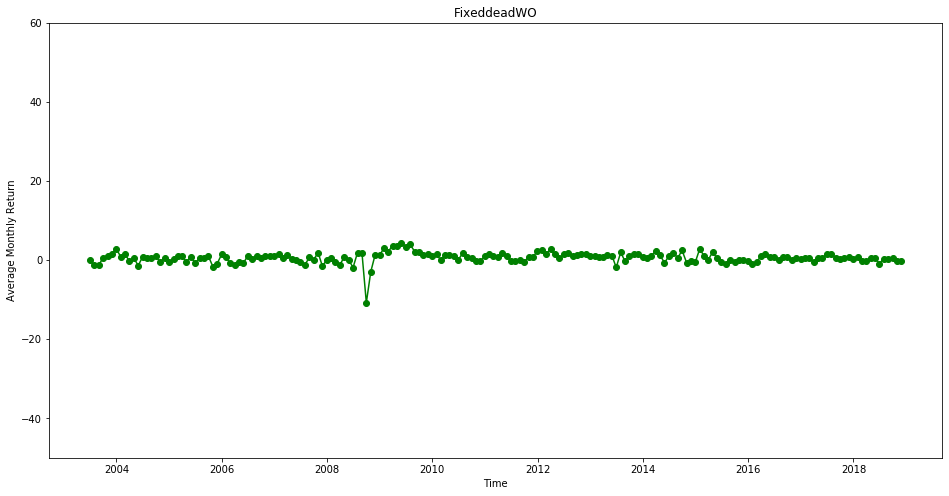

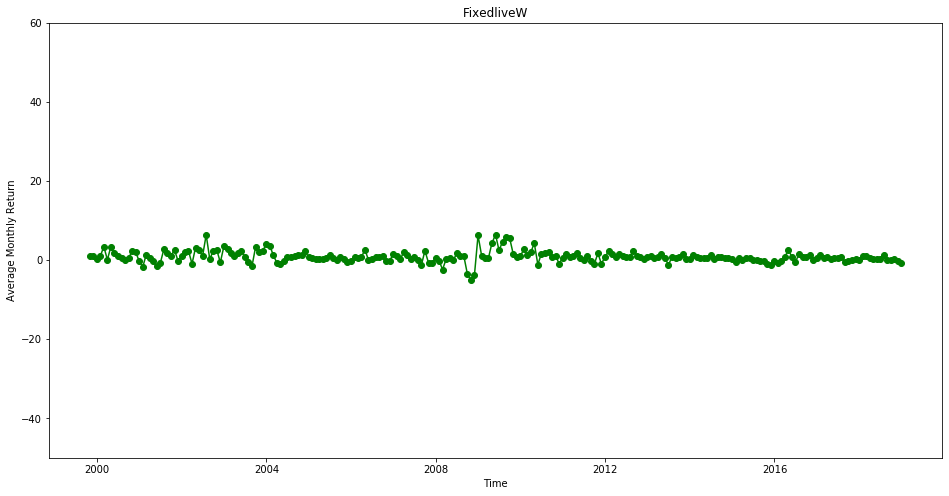

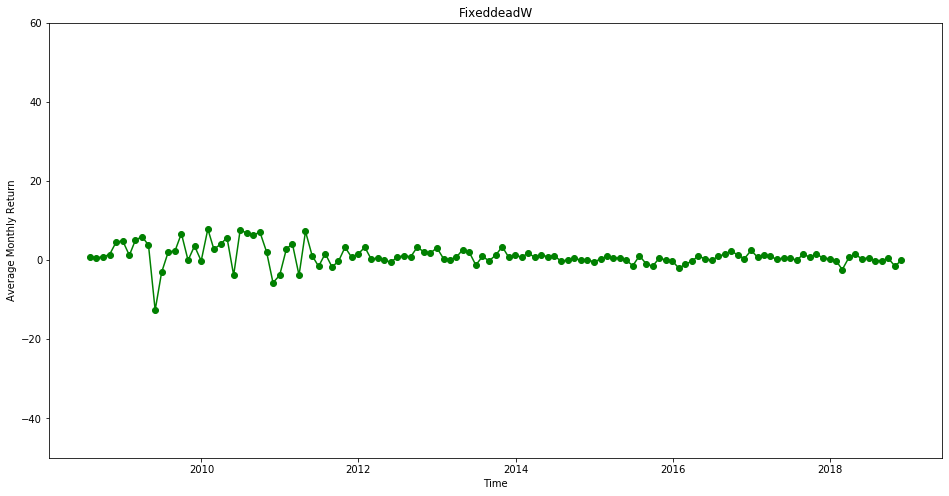

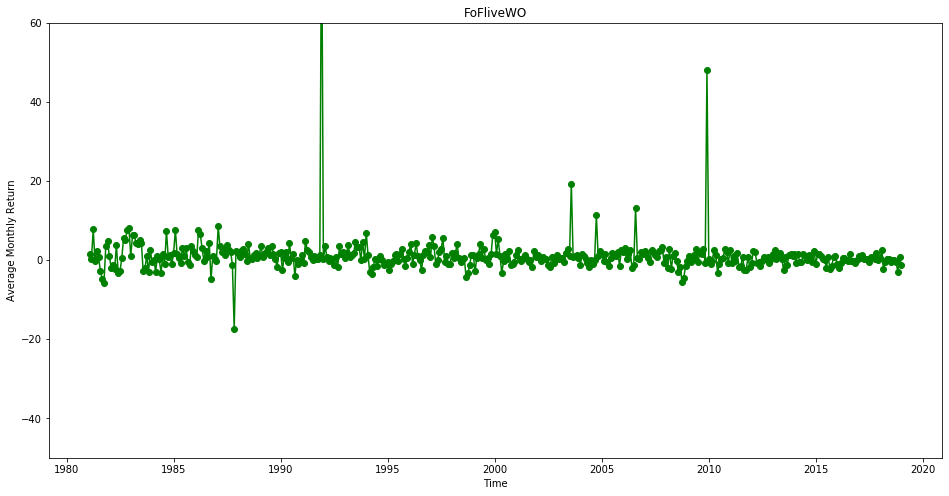

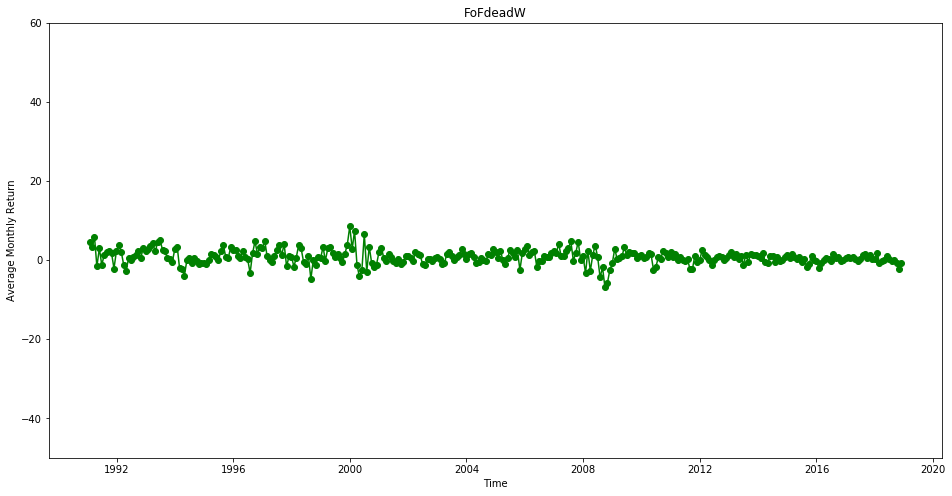

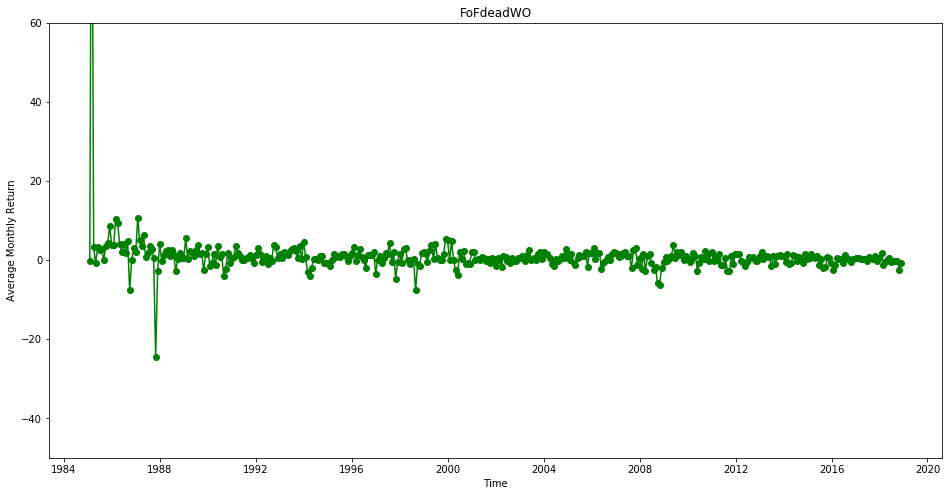

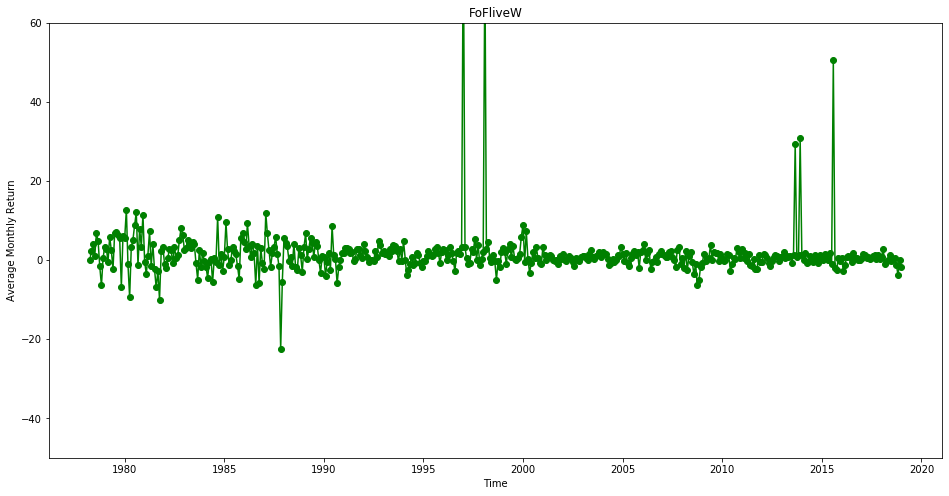

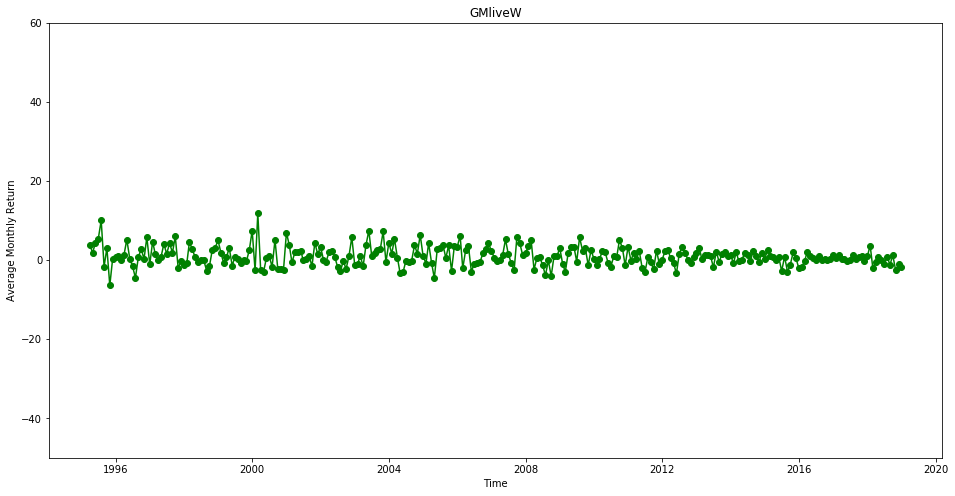

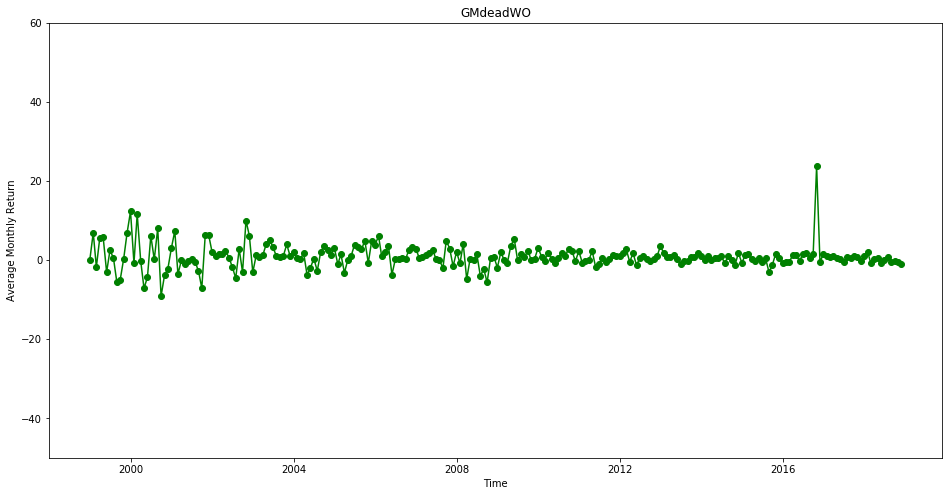

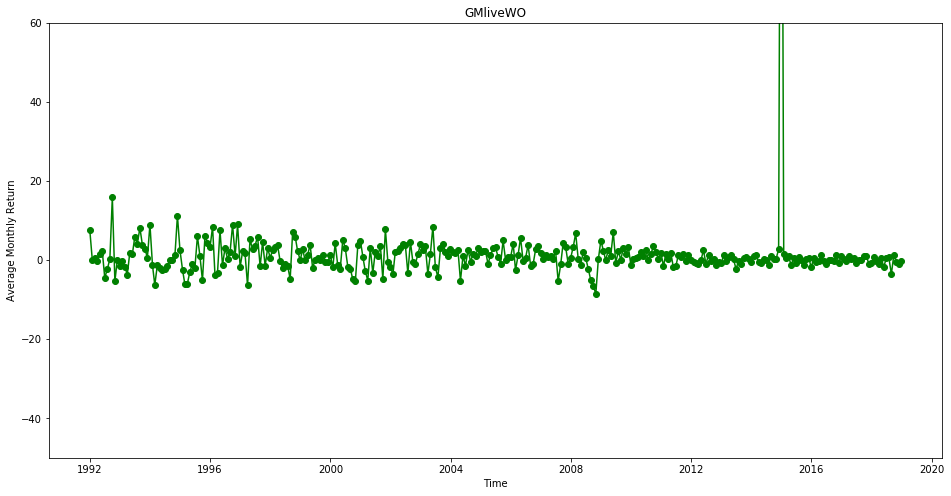

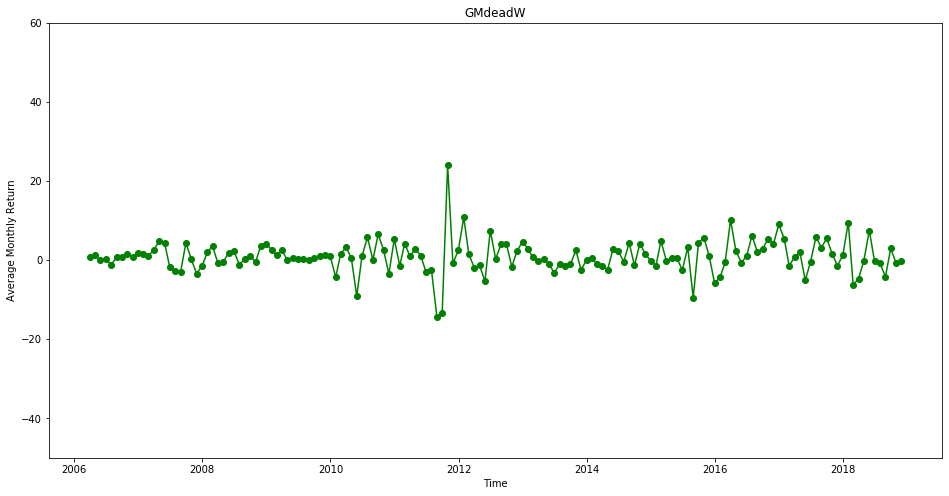

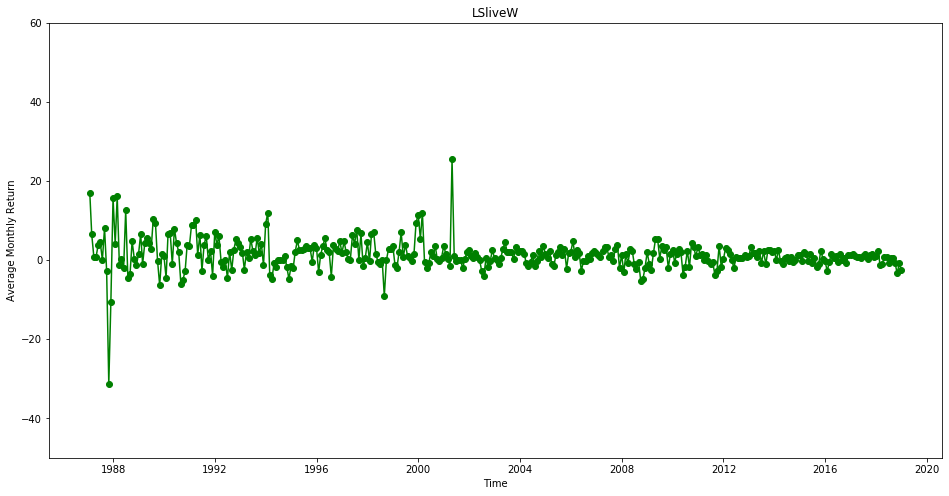

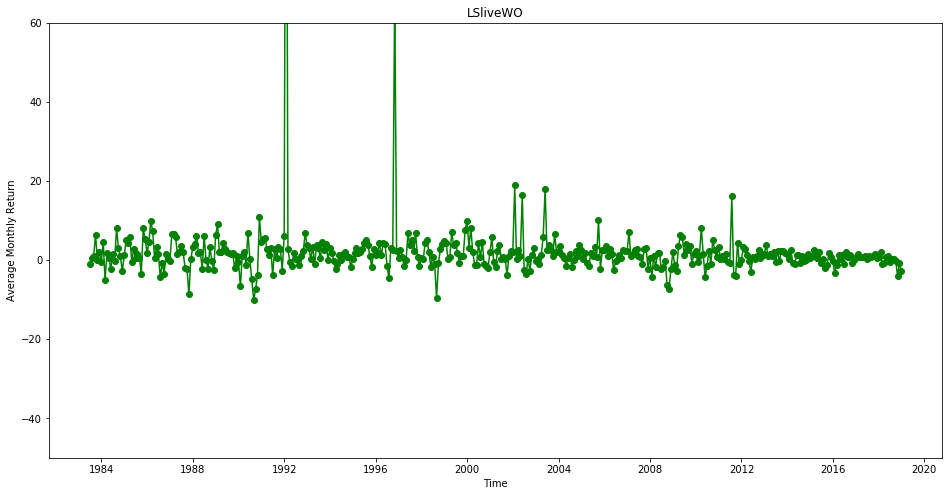

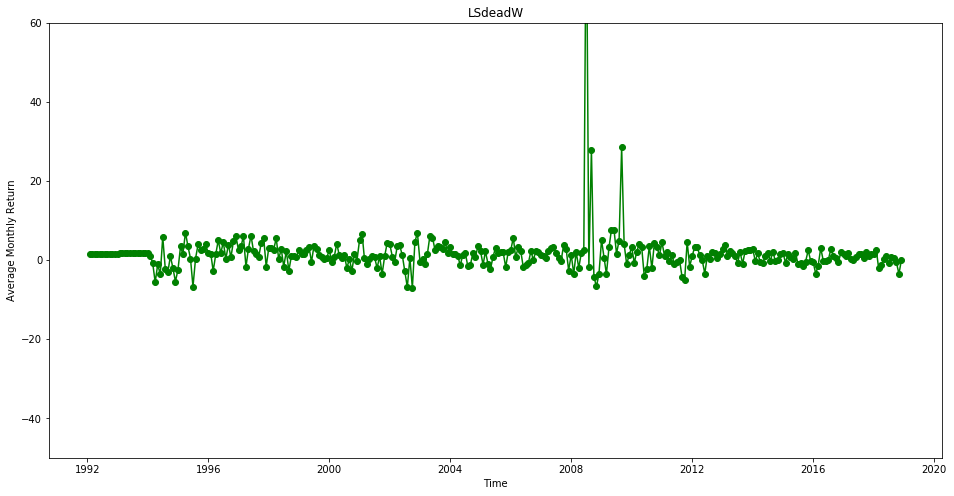

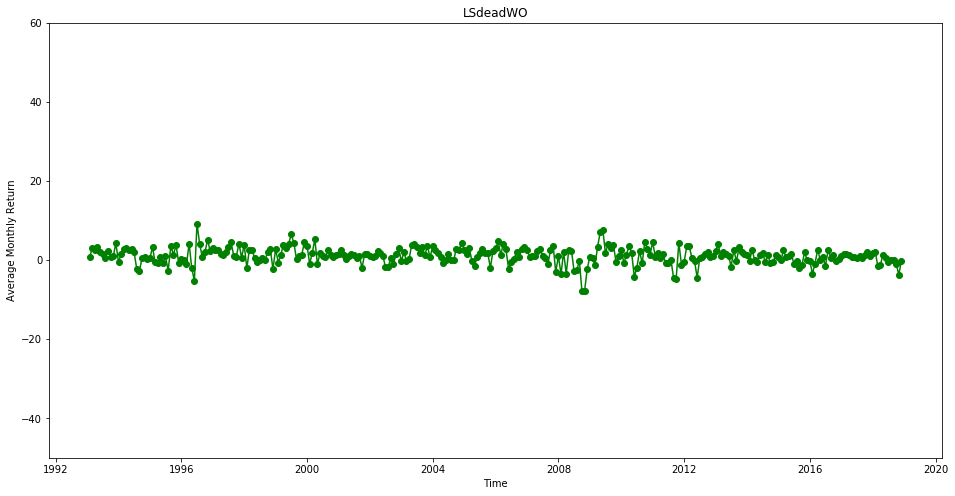

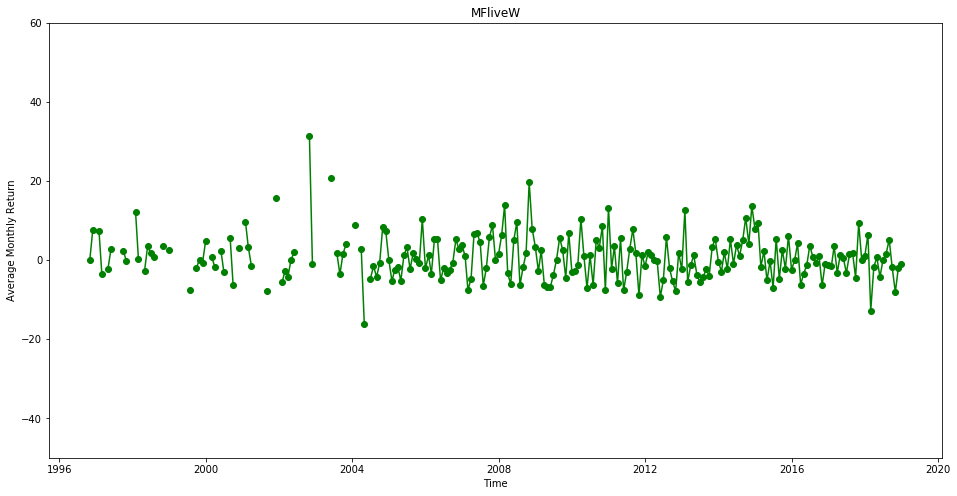

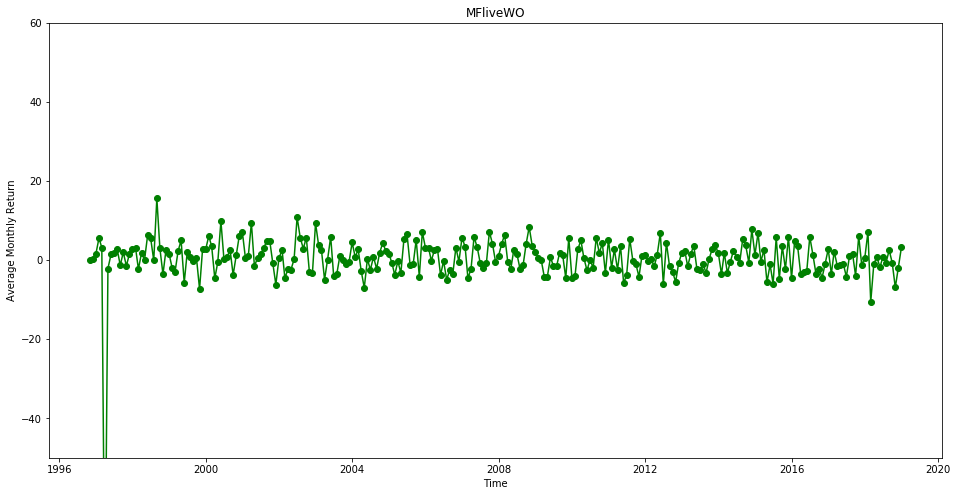

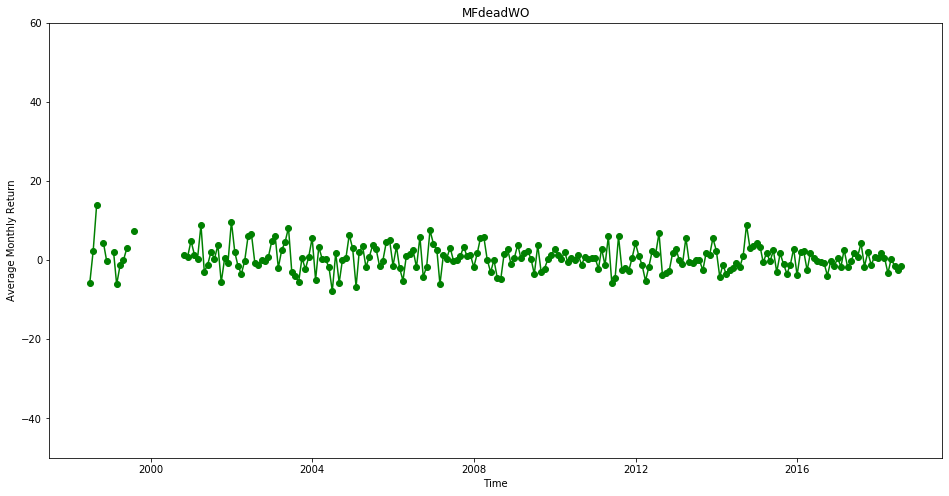

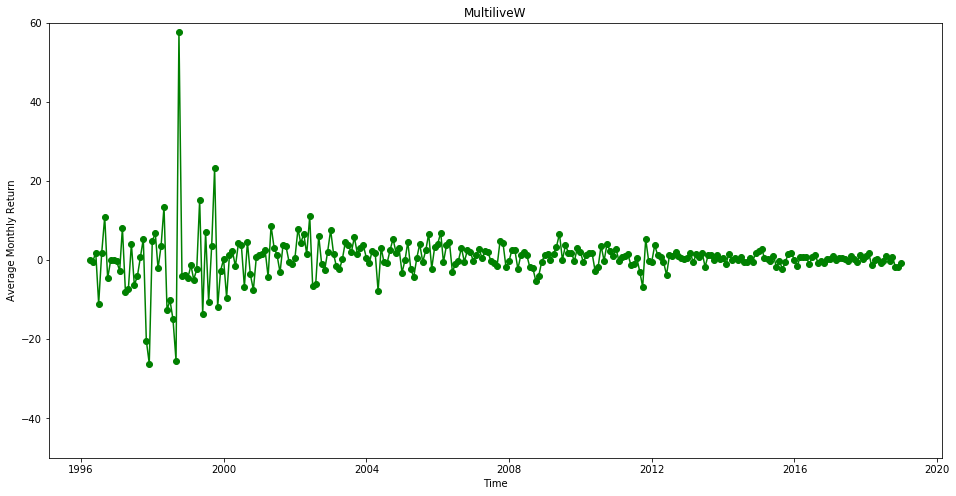

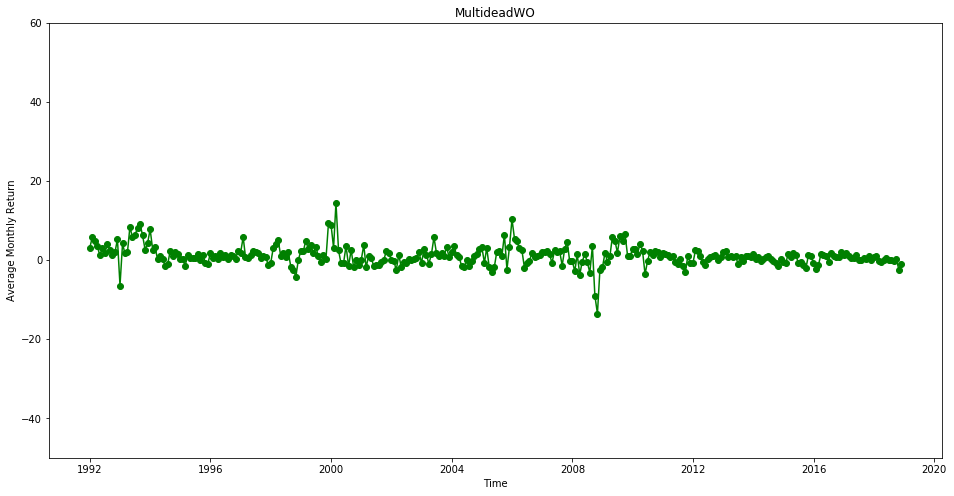

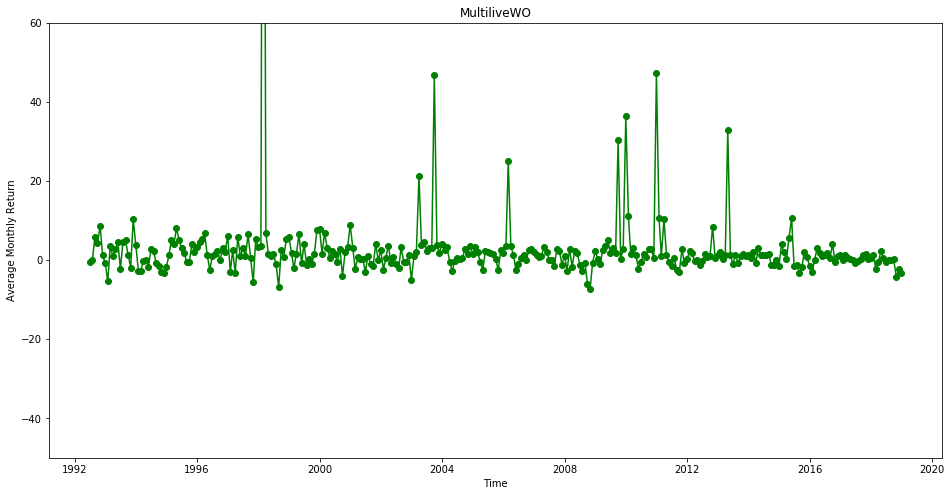

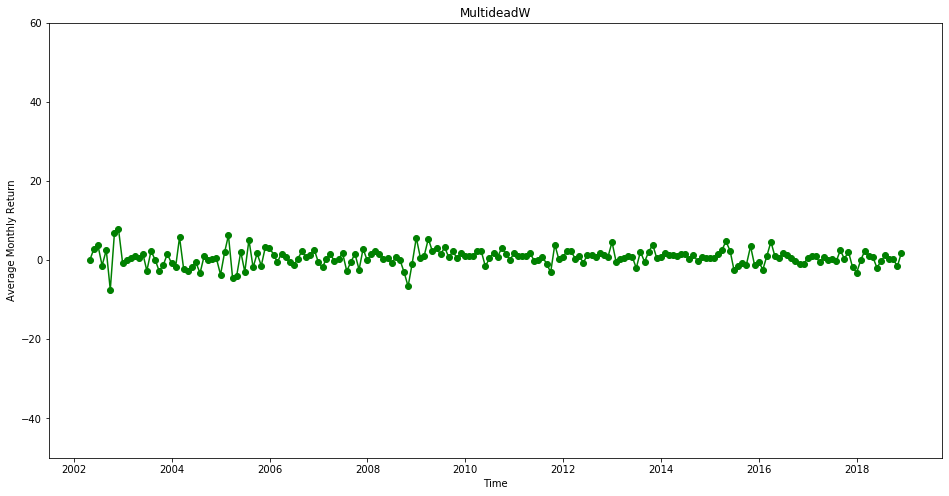

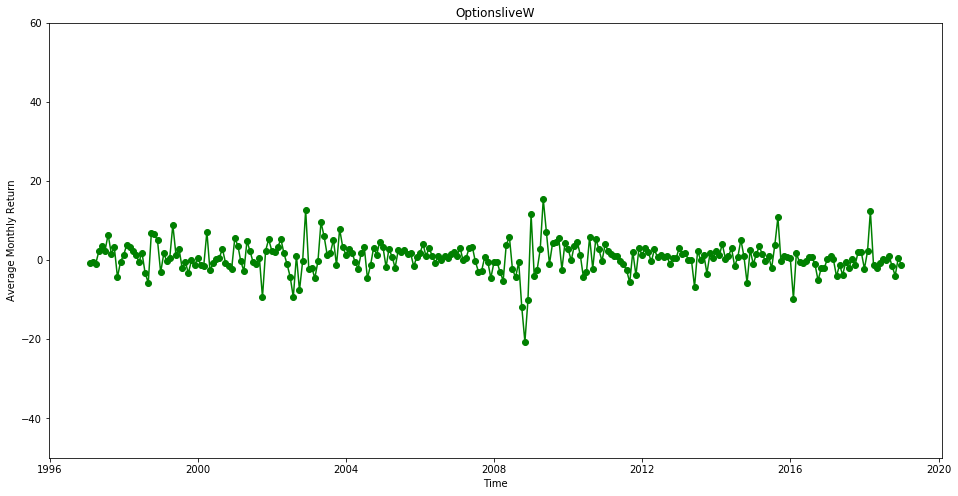

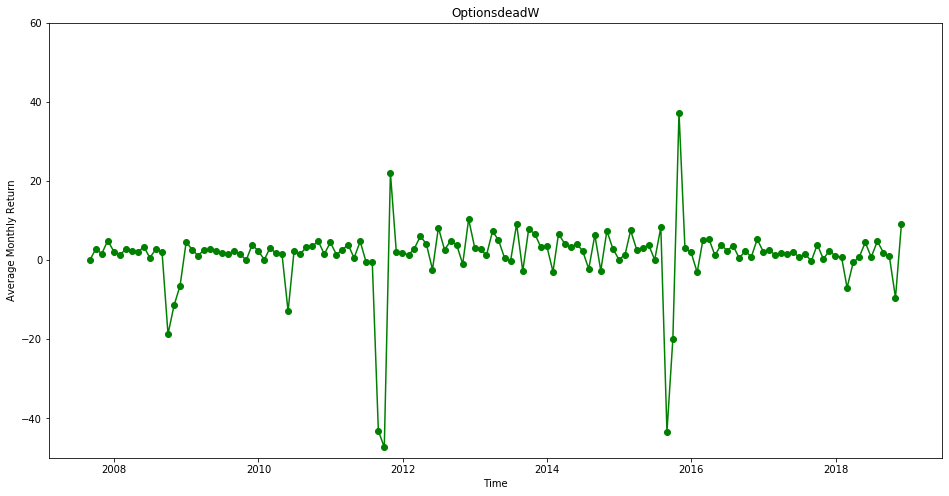

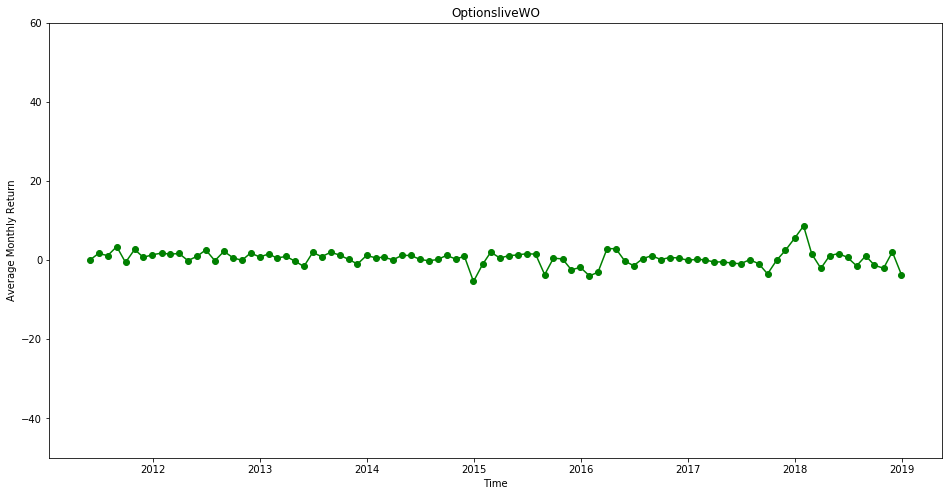

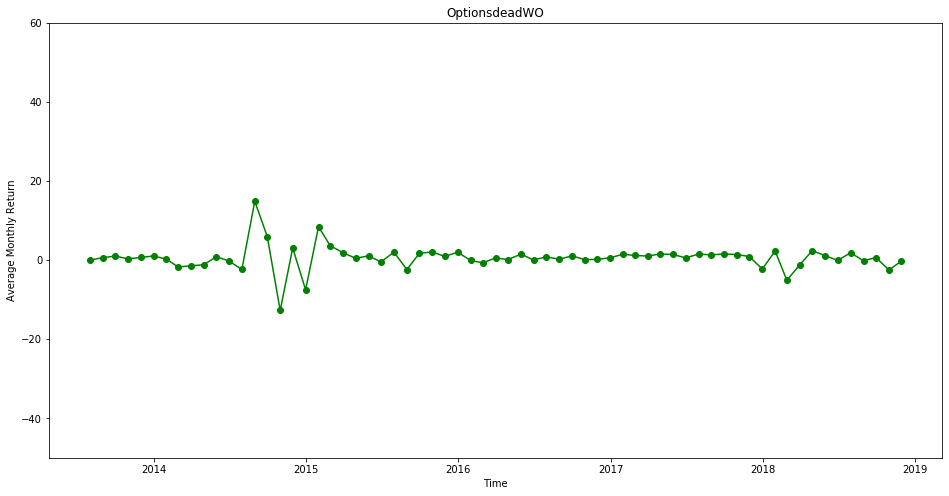

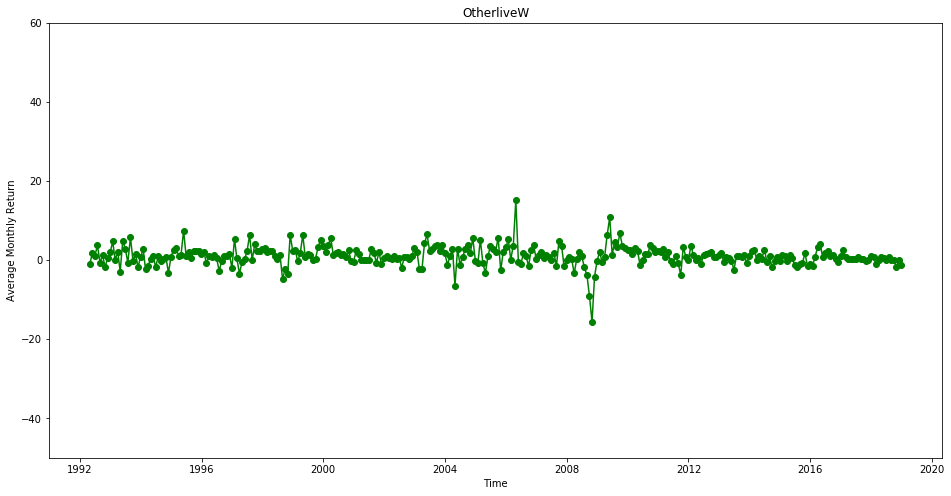

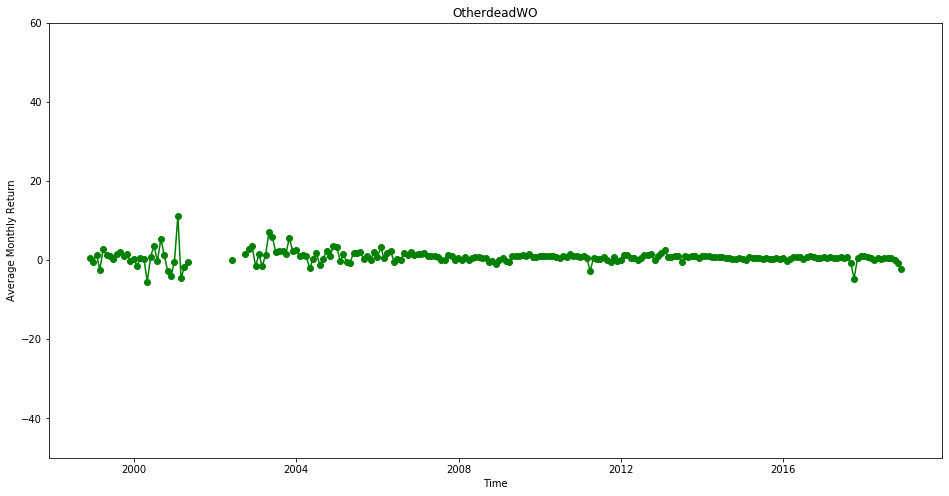

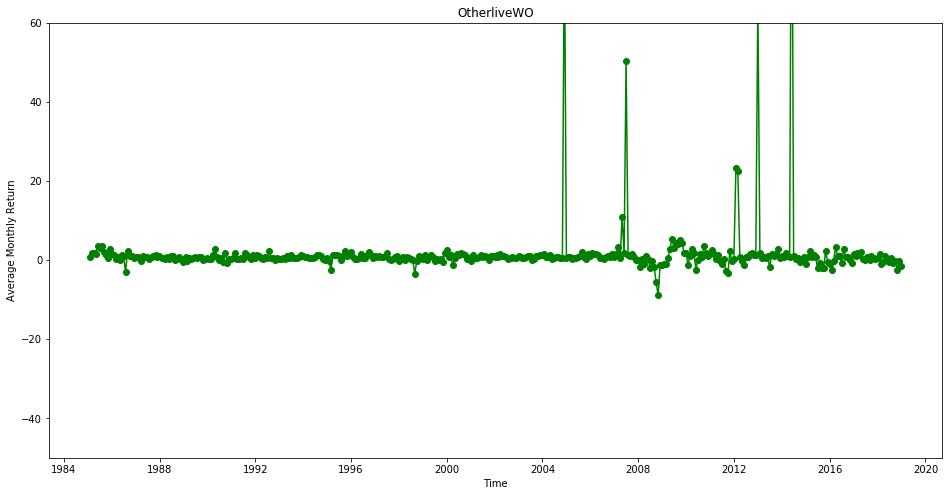

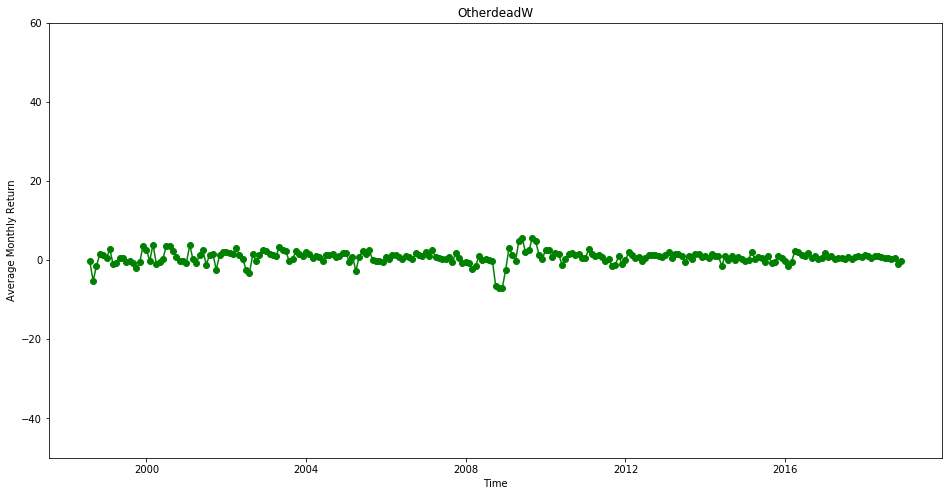

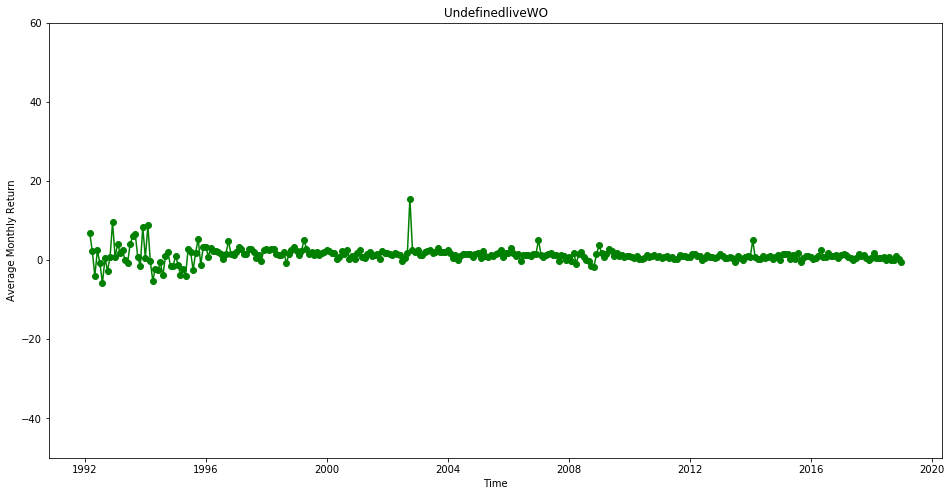

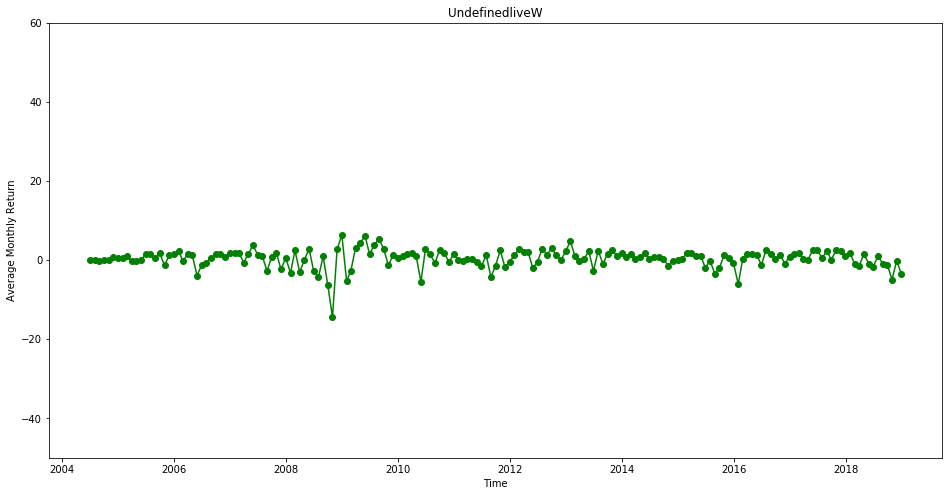

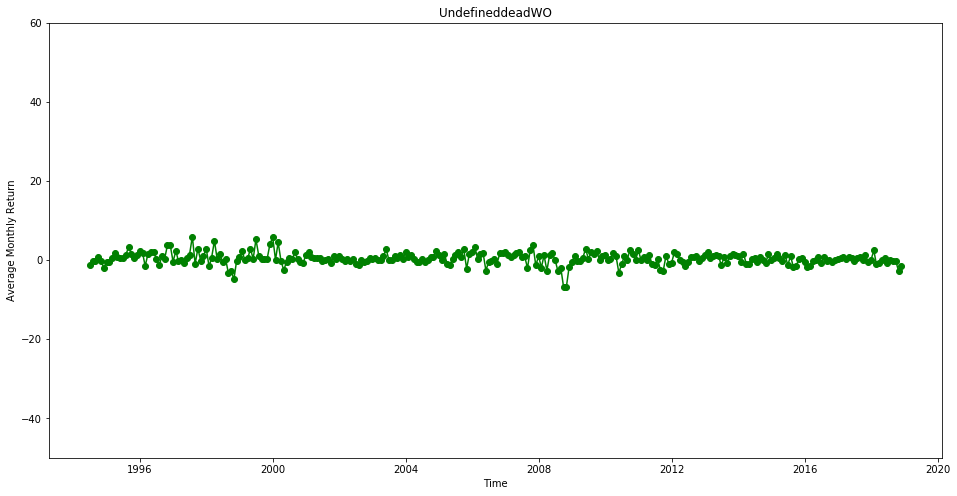

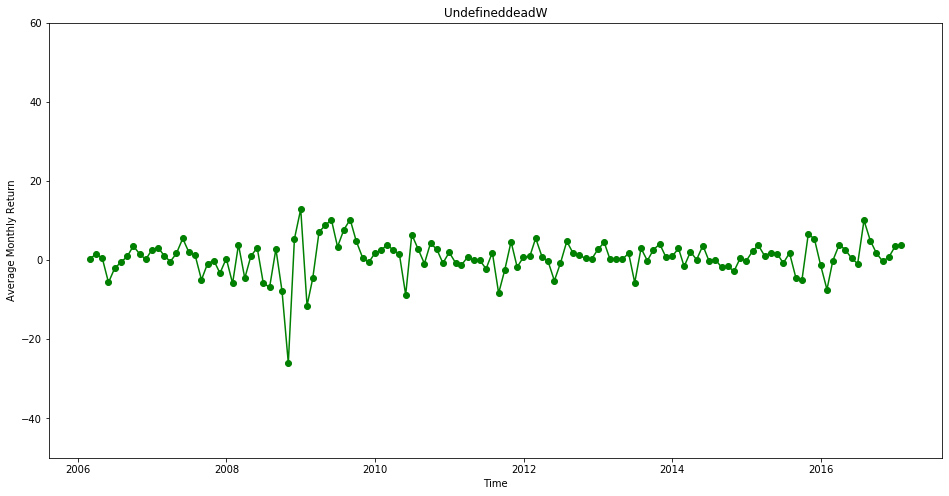

In [26]:
# TODO: This could change if we make the dates the column indices
# TODO: Find min and max to set y-limits

plt.rcParams["figure.figsize"] = (16, 8)

for sheet_name, df in output_sheets_annotated.items():
# for sheet_name, df in list(output_sheets_annotated.items())[:3]:
    
    x_vals = [datetime.datetime(*[int(j) for j in i.split("-")]).date() for i in df.iloc[:, 0]]    
    y_vals = df['mean']
    
    fig, ax = plt.subplots()
    
    ax.plot(x_vals, y_vals, 'go-')
    ax.set_title(sheet_name)
    ax.set_xlabel("Time")
    ax.set_ylabel("Average Monthly Return")
    
    ax.set_ylim([-50, 60])
    # ax.set_ylim([min_val, max_val])
    
    plt.savefig(os.path.join(images_dir, "{}.png".format(sheet_name)))
    plt.show()